## Importing the libraries

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [99]:
data = pd.read_csv(r'../data/iran_transactions.csv')

In [100]:
data.head()

,Status,Time,Card_Type,City,Amount,ID,Amount_Type,Hour
0,Success,2025-09-07 10:48:00,Visa,Tehran,1427657.0,98,Payment,10
1,Success,2025-09-20 13:10:00,Master Card,Tehran,1578078.0,52,Payment,13
2,Fail,2025-09-29 03:27:00,Visa,Tehran,250000.0,20,Payment,3
3,Success,2025-09-15 13:13:00,Discover,Isfahan,0.0,40,Zero_Amount,13
4,Success,2025-09-11 11:11:00,Visa,Tehran,1782689.0,59,Payment,11


## Which city has the most transactions?

In [101]:
city_amount = data.groupby('City')['Amount'].size().sort_values(ascending=False)
city_amount

City
Tehran     3478
Tabriz     1368
Isfahan    1073
Karaj      1037
Mashhad     900
Shiraz      727
Qom         669
Ahvaz       632
Unknown     116
Name: Amount, dtype: int64

In [102]:
city_percent = (city_amount / city_amount.sum()) * 100
city_percent

City
Tehran     34.78
Tabriz     13.68
Isfahan    10.73
Karaj      10.37
Mashhad     9.00
Shiraz      7.27
Qom         6.69
Ahvaz       6.32
Unknown     1.16
Name: Amount, dtype: float64

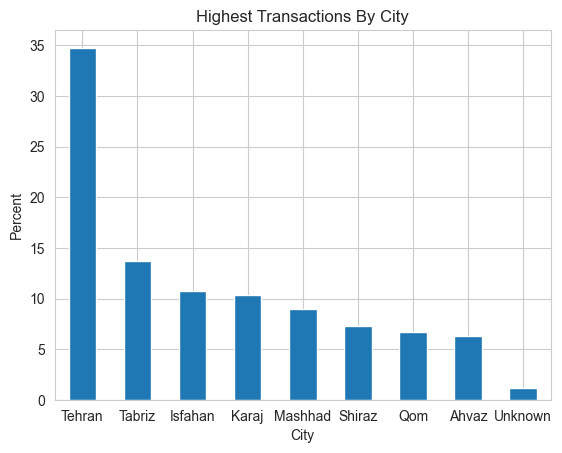

In [103]:
city_percent.plot(kind='bar')
plt.title('Highest Transactions By City')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.ylabel('Percent')
plt.show()

Tehran accounts for the highest share of transactions (34.78%), indicating it is the primary transaction hub, while Qom has the lowest share (6.69%).

## Which city has the most revenue?

In [104]:
city_revenue = data.groupby('City')['Amount'].sum().sort_values(ascending=False)
city_revenue

City
Tehran     1.011669e+12
Tabriz     4.706242e+11
Isfahan    2.705449e+11
Karaj      2.604977e+11
Shiraz     2.503285e+11
Mashhad    2.404067e+11
Ahvaz      2.202773e+11
Qom        1.903246e+11
Unknown    4.006211e+10
Name: Amount, dtype: float64

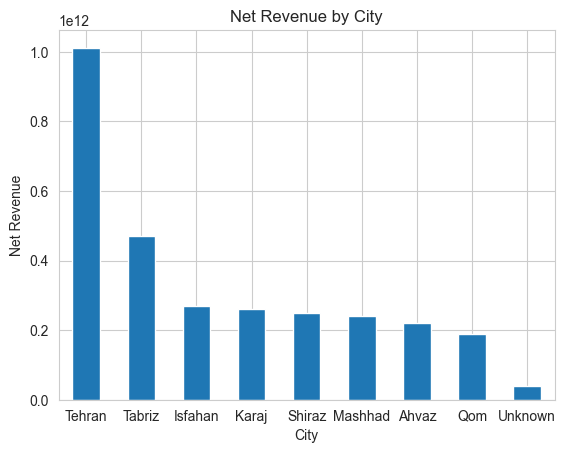

In [105]:
city_revenue.plot(kind="bar")
plt.title("Net Revenue by City")
plt.xlabel("City")
plt.ylabel("Net Revenue")
plt.xticks(rotation=0)
plt.show()

Tehran accounts for the largest share of net revenue(1.011669e+12), while cities like Qom and Karaj contribute comparatively little.

## What time do transactions happen often?

In [106]:
time = data.groupby('Hour')['Amount'].size().sort_values(ascending=False)
time

Hour
2     939
14    820
19    676
7     568
21    542
12    535
11    438
4     423
3     419
13    417
9     413
10    408
23    397
8     397
18    384
5     306
6     290
0     279
20    277
1     276
16    268
17    255
22    144
15    129
Name: Amount, dtype: int64

In [107]:
time_percent = time / time.sum() * 100
time_percent

Hour
2     9.39
14    8.20
19    6.76
7     5.68
21    5.42
12    5.35
11    4.38
4     4.23
3     4.19
13    4.17
9     4.13
10    4.08
23    3.97
8     3.97
18    3.84
5     3.06
6     2.90
0     2.79
20    2.77
1     2.76
16    2.68
17    2.55
22    1.44
15    1.29
Name: Amount, dtype: float64

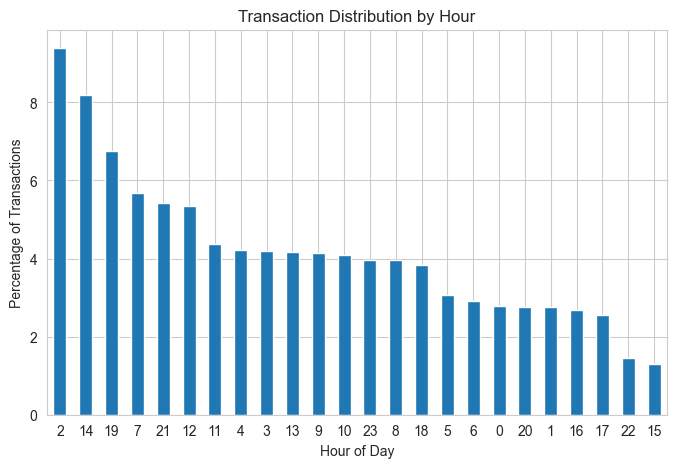

In [108]:
plt.figure(figsize=(8,5))
time_percent.plot(kind='bar')
plt.title("Transaction Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Percentage of Transactions")
plt.xticks(rotation=0)
plt.show()

Hour 2 has the highest share of transactions (around ~9%).

Early hours and mid-day hours dominate.

Late-night hours like 15, 22 have the lowest transaction activity.

## How many transactions were successful and failed?

In [109]:
success_fail = data.groupby('Status')['Amount'].size()
success_fail

Status
Fail       5366
Success    4634
Name: Amount, dtype: int64

In [110]:
success_fail_percent = success_fail / success_fail.sum() * 100
success_fail_percent

Status
Fail       53.66
Success    46.34
Name: Amount, dtype: float64

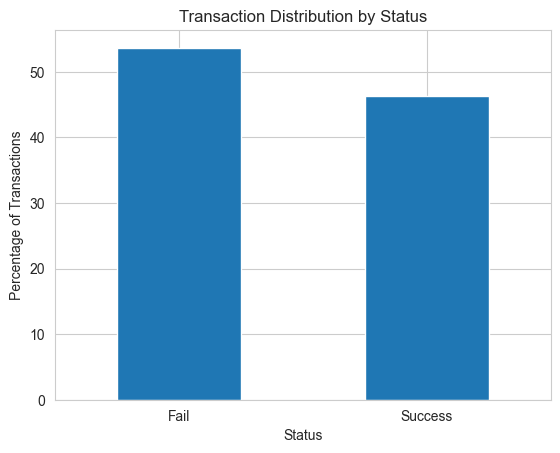

In [111]:
success_fail_percent.plot(kind='bar')
plt.title("Transaction Distribution by Status")
plt.xlabel("Status")
plt.ylabel("Percentage of Transactions")
plt.xticks(rotation=0)
plt.show()

Failed transactions is more (53.66%) than Successful transactions(46.34%)

## What card type the customer uses across cities?

In [112]:
city_card = data.groupby(['City','Card_Type'])['ID'].size().unstack(fill_value=0)
city_card

Card_Type,Amex,Discover,Master Card,Unknown,Visa
City,,,,,
Ahvaz,73,101,222,21,215
Isfahan,151,171,342,36,373
Karaj,136,173,328,27,373
Mashhad,108,146,303,25,318
Qom,85,126,200,23,235
Shiraz,92,123,227,21,264
Tabriz,165,213,451,43,496
Tehran,438,579,1115,110,1236
Unknown,15,15,46,5,35


In [125]:
highest_card_type = city_card.idxmax(axis=1).sort_values(ascending=False)
highest_card_type

City
Isfahan           Visa
Karaj             Visa
Mashhad           Visa
Qom               Visa
Shiraz            Visa
Tabriz            Visa
Tehran            Visa
Ahvaz      Master Card
Unknown    Master Card
dtype: object

In [121]:
highest_card_count = city_card.max(axis=1).sort_values(ascending=False)
highest_card_count

City
Tehran     1236
Tabriz      496
Isfahan     373
Karaj       373
Mashhad     318
Shiraz      264
Qom         235
Ahvaz       222
Unknown      46
dtype: int64

In [122]:
city_result = pd.DataFrame({
    'Highest_Card_Type': highest_card_type,
    'Count': highest_card_count
})
city_result

,Highest_Card_Type,Count
City,,
Ahvaz,Master Card,222
Isfahan,Visa,373
Karaj,Visa,373
Mashhad,Visa,318
Qom,Visa,235
Shiraz,Visa,264
Tabriz,Visa,496
Tehran,Visa,1236
Unknown,Master Card,46


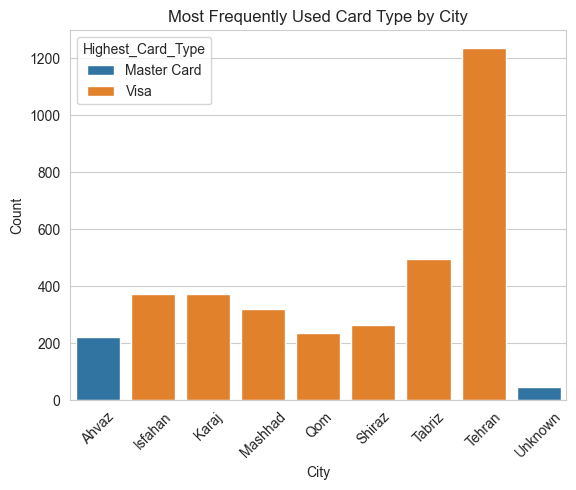

In [136]:
sns.barplot(data=city_result, x='City', y='Count', hue='Highest_Card_Type')
plt.title("Most Frequently Used Card Type by City")
plt.ylabel("Count")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()

## Which card type has failed alot

In [162]:
fail = data[data['Status'] == 'Fail']
failed_card = fail.groupby(['Card_Type','Status']).size().unstack(fill_value=0)
failed_card

Status,Fail
Card_Type,
Amex,673
Discover,885
Master Card,1728
Unknown,165
Visa,1915


In [173]:
failed_card_percent = failed_card['Fail'] / failed_card['Fail'].sum() * 100
failed_card_percent

Card_Type
Amex           12.541931
Discover       16.492732
Master Card    32.202758
Unknown         3.074916
Visa           35.687663
Name: Fail, dtype: float64

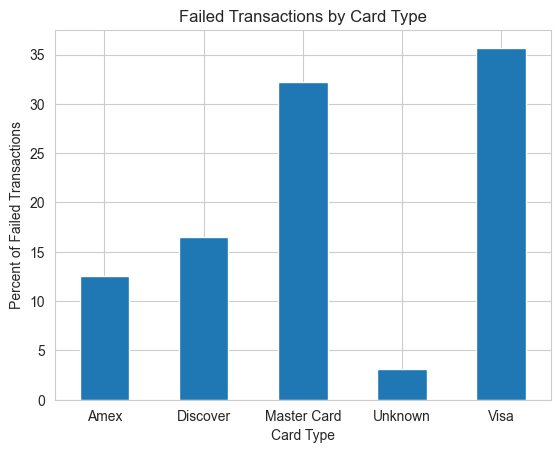

In [175]:
failed_card_percent.plot(kind='bar')
plt.title("Failed Transactions by Card Type")
plt.xlabel("Card Type")
plt.ylabel("Percent of Failed Transactions")
plt.xticks(rotation=0)
plt.show()

Visa and Master Card contribute the largest share of failed transactions, largely reflecting their higher overall usage. This suggests failures are volume-driven rather than isolated to a single card provider.

## Which cities have failed payments

In [192]:
failed_city = fail.groupby('City').size().sort_values(ascending=False)
failed_city

City
Tehran     1833
Tabriz      737
Isfahan     581
Karaj       558
Mashhad     483
Shiraz      400
Qom         371
Ahvaz       335
Unknown      68
dtype: int64

In [193]:
failed_city_percent = failed_city / failed_city.sum()*100
failed_city_percent

City
Tehran     34.159523
Tabriz     13.734625
Isfahan    10.827432
Karaj      10.398807
Mashhad     9.001118
Shiraz      7.454342
Qom         6.913902
Ahvaz       6.243012
Unknown     1.267238
dtype: float64

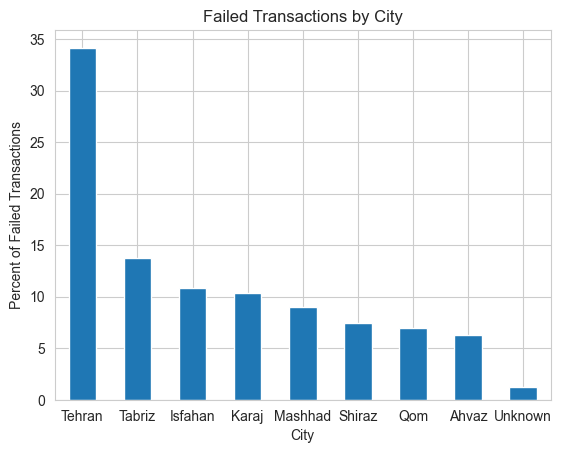

In [194]:
failed_city_percent.plot(kind='bar')
plt.title("Failed Transactions by City")
plt.xlabel("City")
plt.ylabel("Percent of Failed Transactions")
plt.xticks(rotation=0)
plt.show()

Failed transactions are concentrated in major cities such as Tehran, indicating that higher failure counts are driven by transaction volume rather than isolated regional issues.

## How many 0-payments the customer has got?

In [222]:
zero = data[data['Amount_Type'] == 'Zero_Amount']
zero_customer = zero.groupby('ID').size().sort_values(ascending=False)
zero_customer

ID
17    18
65    18
76    17
67    16
46    15
      ..
9      5
33     5
16     5
39     4
48     4
Length: 99, dtype: int64

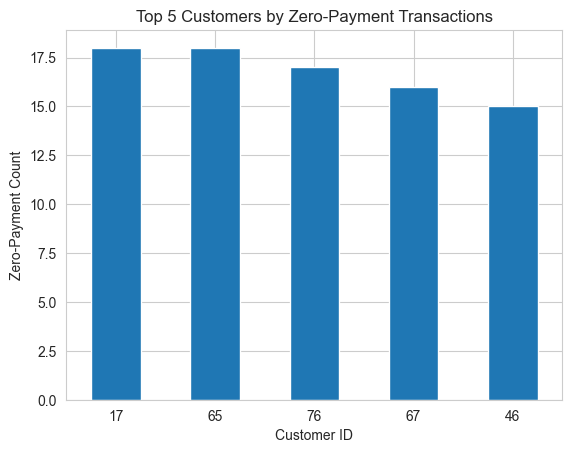

In [223]:
zero_customer.head(5).plot(kind='bar')
plt.title("Top 5 Customers by Zero-Payment Transactions")
plt.xticks(rotation=0)
plt.xlabel("Customer ID")
plt.ylabel("Zero-Payment Count")
plt.show()

A small number of customers received multiple zero-payment transactions, while most customers had only one. This suggests zero-payment events are concentrated among a limited group and may warrant further review to understand promotion usage or special booking privileges.

## 0 payments given to which cities the most?

In [224]:
zero_city = zero.groupby('City').size().sort_values(ascending=False)
zero_city

City
Tehran     344
Tabriz     128
Isfahan    107
Karaj       95
Mashhad     85
Shiraz      83
Qom         68
Ahvaz       54
Unknown     17
dtype: int64

In [226]:
zero_city_percent = zero_city / zero_city.sum() * 100
zero_city_percent

City
Tehran     35.066259
Tabriz     13.047910
Isfahan    10.907238
Karaj       9.683996
Mashhad     8.664628
Shiraz      8.460754
Qom         6.931702
Ahvaz       5.504587
Unknown     1.732926
dtype: float64

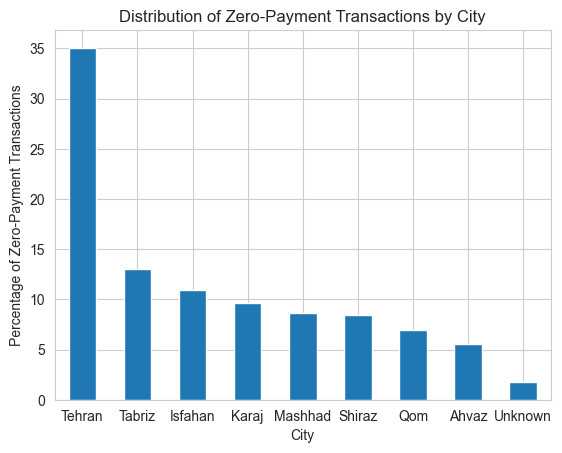

In [228]:
zero_city_percent.plot(kind='bar')
plt.title("Distribution of Zero-Payment Transactions by City")
plt.xlabel("City")
plt.ylabel("Percentage of Zero-Payment Transactions")
plt.xticks(rotation=0)
plt.show()